<a href="https://colab.research.google.com/github/LilySaya/Fundamentals_of_AI/blob/main/LogisticRegressionMultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improvement here
Make a class and use that class
Make it a general case (Not specific to this data)

In [1]:
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names).assign(target = iris.target)

#Prepare parameter
x = df[['petal length (cm)','petal width (cm)']]
n_samples, n_features = x.shape
x = x.to_numpy()
X = np.column_stack([np.ones(n_samples),x])
X = X.T

y = df['target']
y = y.to_numpy()
y = y.T
Yn = np.identity(3)

#Encode OneHotVectors
Yh = Yn[:,y[0]]
Yh = Yh.reshape(-1,1)


for i in range(n_samples-1):
  if Yh.shape[1] == n_samples:
    break
  else:
    Yh = np.column_stack([Yh,Yn[:,y[i+1]]])


#Train test split
X_train, X_test, y_train, y_test =  train_test_split(X.T,Yh.T, random_state = 0, test_size = 0.1)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T


Y1 = y_train[0,:].reshape(1,-1)
Y2 = y_train[1,:].reshape(1,-1)
Y3 = y_train[2,:].reshape(1,-1)

#Parameter w
w = np.zeros((3,3))
w1 = w[:,0]
w1 = w1.reshape(-1,1)
w2 = w[:,1]
w2 = w1.reshape(-1,1)
w3 = w[:,2]
w3 = w1.reshape(-1,1)


In [3]:
#Learning rate eta
eta = 0.1

for _ in range(1000):
  #Prepare the exponentials
  e1 = np.exp(w1.T @ X_train)
  e2 = np.exp(w2.T @ X_train)
  e3 = np.exp(w3.T @ X_train)
  E = e1+e2+e3

  f11 =  Y1*(e1/E)
  f12 =  Y2*(e1/E)
  f13 =  Y3*(e1/E)

  f21 = Y1*(e2/E)
  f22 = Y2*(e2/E)
  f23 = Y3*(e2/E)

  f31 = Y1*(e3/E)
  f32 = Y2*(e3/E)
  f33 = Y3*(e3/E)

  #gradient
  dw1 = -(1/X_train.shape[1])*( (Y1- f11 - f12 - f13)@X_train.T)
  dw2 = -(1/X_train.shape[1])*( (Y2 - f21 - f22 - f23)@X_train.T)
  dw3 = -(1/X_train.shape[1])*( (Y3 - f31 - f32 - f33)@X_train.T)
  dw1 = dw1.reshape(-1,1)
  dw2 = dw2.reshape(-1,1)
  dw3 = dw3.reshape(-1,1)
  #Find new w
  w1 = w1 - eta*dw1
  w2 = w2 - eta*dw2
  w3 = w3 - eta*dw3

def HotKeyDecode (x):
  n_f, n = x.shape
  y_pred = np.zeros(n)
  result = np.amax(x, axis = 0)
  for i in range(n):
    if x[0,i] == result[i]:
      y_pred[i] = 0
    elif x[1,i] == result[i]:
      y_pred[i] = 1
    else:
      y_pred[i] = 2
  return y_pred

def predict(x): #Row: num of features, column: num of samples
  n_f, n_num = x.shape
  e1 = np.exp(w1.T @ x)
  e2 = np.exp(w2.T @ x)
  e3 = np.exp(w3.T @ x)
  E = e1+e2+e3
  prob1 = e1/E
  prob2 = e2/E
  prob3 = e3/E
  prob_stack = np.stack([prob1[0,:],prob2[0,:],prob3[0,:]])
  result = np.amax(prob_stack, axis = 0)

  return HotKeyDecode(prob_stack)


def colorlist(input):
    cols=[]
    for value in input:
        if value == 0:
            cols.append('red')
        elif value== 1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols


<ipython-input-4-3b1fbc895517>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('black')
<ipython-input-4-3b1fbc895517>:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('black')


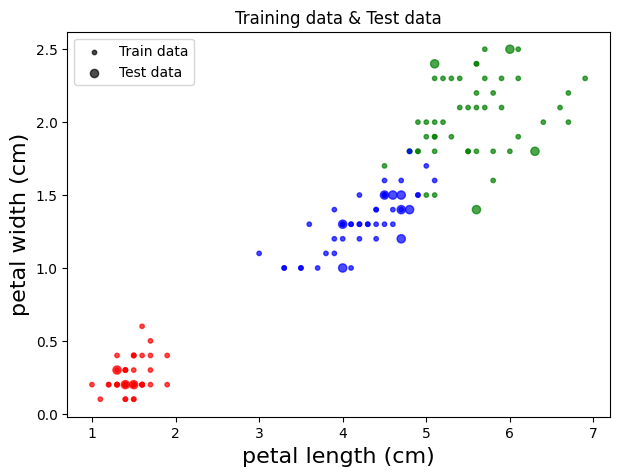

In [4]:
#Plot 1 for Training data & Test data
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[1,:], X_train[2,:], alpha = 0.7, s = 10, c = colorlist(HotKeyDecode(y_train)))
test = ax.scatter(X_test[1,:], X_test[2,:], alpha = 0.7, s = 35, c = colorlist(HotKeyDecode(y_test)))
plt.legend((train,test),("Train data","Test data"))
ax.set_title("Training data & Test data")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

#Legend Handles
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')


Text(0, 0.5, 'petal width (cm)')

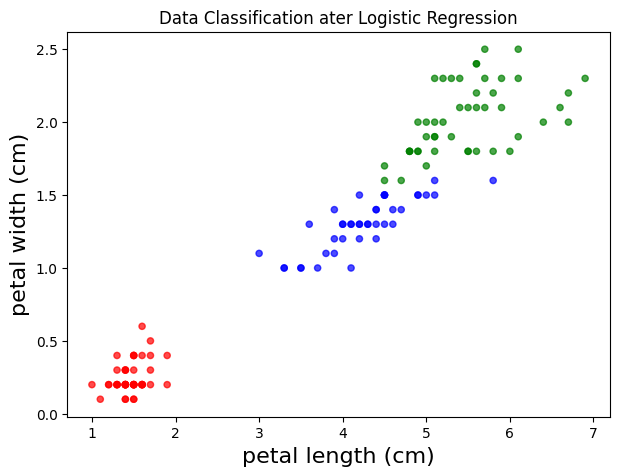

In [5]:
#Plot 2 for Data after LogisticRegresssion
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[1,:], X_train[2,:], alpha = 0.7, s = 20, c = colorlist(predict(X_train)))
ax.set_title("Data Classification ater Logistic Regression")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

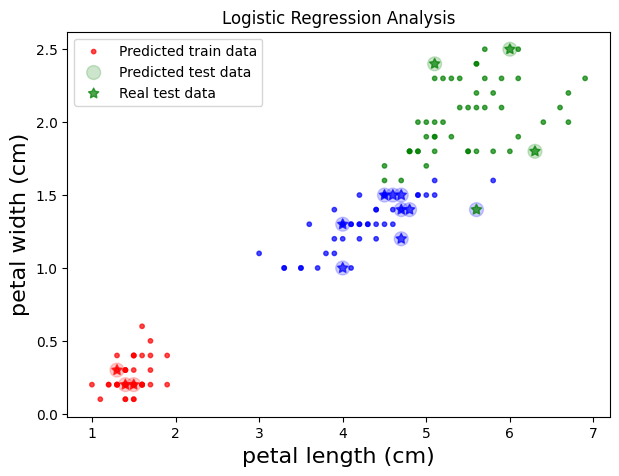

In [6]:
#Plot 3 for Analysis
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[1,:], X_train[2,:], alpha = 0.7, s = 10, c = colorlist(predict(X_train)))
test_result = ax.scatter(X_test[1,:], X_test[2,:], alpha = 0.2, s = 100, c = colorlist(predict(X_test)))
test_real = ax.scatter(X_test[1,:], X_test[2,:], alpha = 0.7, s = 60, marker = (5,1), c = colorlist(HotKeyDecode(y_test)))
ax.set_title("Logistic Regression Analysis")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

plt.legend((train,test_result, test_real),("Predicted train data","Predicted test data","Real test data"))